In [1]:
import pandas as pd

tweet_df = pd.read_csv('../data/cleaned_airline_tweets.csv')

In [2]:
tweet_df.head()

,text,sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,"@VirginAmerica it was amazing, and arrived an ...",positive
2,@VirginAmerica I &lt;3 pretty graphics. so muc...,positive
3,@VirginAmerica So excited for my first cross c...,positive
4,I ❤️ flying @VirginAmerica. ☺️👍,positive


In [3]:
from pandas_profiling import ProfileReport

profile = ProfileReport(tweet_df, title="Tweets Report", explorative=True)

profile

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
# Only consider positive vs negative
# tweet_df = tweet_df[tweet_df['sentiment'].isin(['negative', 'positive'])]

In [5]:
tweet_df['sentiment'].value_counts(normalize=True)

positive    0.348705
neutral     0.336528
negative    0.314767
Name: sentiment, dtype: float64

In [6]:
# tweet_df['sentiment'] = tweet_df['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(tweet_df, test_size=0.2, random_state=0, stratify=tweet_df['sentiment'])

print(f'Count of tweets in training set: {train.shape[0]:,}')
print(f'Count of tweets in testing set: {test.shape[0]:,}')

Count of tweets in training set: 3,088
Count of tweets in testing set: 772


In [8]:
# TODO show words in common

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()  # A
single_word = cv.fit_transform(train['text'])  #  B

print(single_word.shape)  # 6,018 features!
        
# A Instantiate the CountVectorizer
# B In one line, fit the CountVectorizer to our training set and transform it into a matrix

(3088, 6018)


In [10]:
for i, (token, token_index) in enumerate(cv.vocabulary_.items()):
    print(f'Token: {token} Index {token_index}')
    if i == 10:
        break


Token: jetblue Index 3126
Token: maybe Index 3547
Token: ll Index 3382
Token: just Index 3177
Token: go Index 2595
Token: to Index 5401
Token: cleveland Index 1437
Token: instead Index 3014
Token: smh Index 4944
Token: rt Index 4686
Token: our Index 3993


In [11]:
# Count Vectorizer feature matrix
pd.DataFrame(single_word.todense(), columns=cv.get_feature_names())

,00,000,000114,000ft,00pm,0167560070877,02,0200,03,0400,...,zacks_com,zakkohane,zero,zf5wjgtxzt,zgoqoxjbqy,zj76,zone,zsdgzydnde,zukes,zv2pt6trk9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3083,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3084,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
single_word

<3088x6018 sparse matrix of type '<class 'numpy.int64'>'
	with 45222 stored elements in Compressed Sparse Row format>

In [13]:
cv = CountVectorizer(max_features=20)  # A 

limited_vocab = cv.fit_transform(train['text'])

pd.DataFrame(limited_vocab.toarray(), index = train['text'], columns = cv.get_feature_names())

# A setting max_features chooses most common words

,americanair,and,flight,for,in,is,it,jetblue,me,my,of,on,southwestair,thanks,the,to,united,usairways,you,your
text,,,,,,,,,,,,,,,,,,,,
@JetBlue Maybe I'll just go to Cleveland instead.,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
smh RT @JetBlue: Our fleet's on fleek. http://t.co/IRiXaIfJJX,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
@SouthwestAir I would.,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
@USAirways trying to Cancelled Flight a flight urgently...get hung up on twice??? Sweet refund policy,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
@AmericanAir you are beyond redemption. Jfk. Baggage claim looks like a luggage warehouse,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
“@JetBlue: Our fleet's on fleek. http://t.co/b5ttno68xu” I just 🙈,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
"@united caught earlier flight to ORD. Gate checked bag, and you've lost it at O'Hare. original flight lands in 20minutes. #frustrating!",0,1,2,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0
@AmericanAir hi when will your next set of flights be out for next year from Dublin???,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [14]:
cv = CountVectorizer(ngram_range=(1, 3))  # A
more_ngrams = cv.fit_transform(train['text'])

print(more_ngrams.shape)  # 70,613 features!

pd.DataFrame(more_ngrams.toarray(), index = train['text'], columns = cv.get_feature_names()).head()

# A Consider unigrams bigrams, and trigrams

(3088, 70613)


,00,00 phone,00 phone hold,00 pm,00 pm that,000,000 air,000 air miles,000 crewmembers,000 crewmembers embody,...,zj76 how,zj76 how did,zone,zone was,zone was after,zsdgzydnde,zukes,zukes non,zukes non vegan,zv2pt6trk9
text,,,,,,,,,,,,,,,,,,,,,
@JetBlue Maybe I'll just go to Cleveland instead.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
smh RT @JetBlue: Our fleet's on fleek. http://t.co/IRiXaIfJJX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@SouthwestAir I would.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@USAirways trying to Cancelled Flight a flight urgently...get hung up on twice??? Sweet refund policy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
@AmericanAir you are beyond redemption. Jfk. Baggage claim looks like a luggage warehouse,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
single_word.sum(axis=0).argsort()[::-1]

matrix([[6017, 4607, 2527, ..., 5983, 5316, 5401]])

In [16]:
cv = CountVectorizer()

cv.inverse_transform(cv.fit_transform(train['text'].head()))  # bag of words, order doesn't matter

[array(['jetblue', 'maybe', 'll', 'just', 'go', 'to', 'cleveland',
        'instead'], dtype='<U12'),
 array(['jetblue', 'smh', 'rt', 'our', 'fleet', 'on', 'fleek', 'http',
        'co', 'irixaifjjx'], dtype='<U12'),
 array(['southwestair', 'would'], dtype='<U12'),
 array(['to', 'on', 'usairways', 'trying', 'cancelled', 'flight',
        'urgently', 'get', 'hung', 'up', 'twice', 'sweet', 'refund',
        'policy'], dtype='<U12'),
 array(['americanair', 'you', 'are', 'beyond', 'redemption', 'jfk',
        'baggage', 'claim', 'looks', 'like', 'luggage', 'warehouse'],
       dtype='<U12')]

In [17]:
# most common words in our training set
cv = CountVectorizer(max_features=10)
cv.fit(train['text'])

cv.get_feature_names()


['and',
 'flight',
 'for',
 'jetblue',
 'on',
 'southwestair',
 'the',
 'to',
 'united',
 'you']

In [18]:
# most common words non stopwords in our training set
cv = CountVectorizer(stop_words='english', max_features=10)  # A
cv.fit(train['text'])

cv.get_feature_names()

# A Don't consider common words as tokens like "A", "the", "an"

['americanair',
 'flight',
 'http',
 'jetblue',
 'service',
 'southwestair',
 'thank',
 'thanks',
 'united',
 'usairways']

In [19]:
%run ./Base.ipynb

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=10000)  # A

ml_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # B
    ('classifier', clf)
])

params = {
    'vectorizer__lowercase': [True, False],  # C
    'vectorizer__stop_words': [None, 'english'],
    'vectorizer__max_features': [100, 1000, 5000],
    'vectorizer__ngram_range': [(1, 1), (1, 3)],
    
    'classifier__C': [1e-1, 1e0, 1e1]  
    
}

print("Count Vectorizer + Log Reg\n=====================")
advanced_grid_search(  # D
    train['text'], train['sentiment'], test['text'], test['sentiment'], 
    ml_pipeline, params
)

# A Very simple classifier
# B our count vectorizer
# C lowercase is another parameter that if true, will lowercase all text before tokenizing
# D Function from our base notebook that will train our pipeline on the training set and calculate
## a classification report from the testing set

Count Vectorizer + Log Reg
              precision    recall  f1-score   support

    negative       0.79      0.77      0.78       243
     neutral       0.75      0.78      0.77       260
    positive       0.84      0.83      0.84       269

    accuracy                           0.79       772
   macro avg       0.79      0.79      0.79       772
weighted avg       0.79      0.79      0.79       772

Best params: {'classifier__C': 1.0, 'vectorizer__lowercase': True, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1), 'vectorizer__stop_words': None}
Overall took 46.12 seconds


Pipeline(steps=[('vectorizer', CountVectorizer(max_features=5000)),
                ('classifier', LogisticRegression(max_iter=10000))])

In [21]:
# TODO calculate how long it takes to vectorize and predict test to compare time

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10)

tfdf_text = tfidf_vectorizer.fit_transform(train['text'])
pd.DataFrame(tfdf_text.toarray(), index = train['text'], columns = tfidf_vectorizer.get_feature_names())

,americanair,flight,http,jetblue,service,southwestair,thank,thanks,united,usairways
text,,,,,,,,,,
@JetBlue Maybe I'll just go to Cleveland instead.,0.0,0.000000,0.00000,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
smh RT @JetBlue: Our fleet's on fleek. http://t.co/IRiXaIfJJX,0.0,0.000000,0.78863,0.614869,0.0,0.000000,0.0,0.0,0.000000,0.000000
@SouthwestAir I would.,0.0,0.000000,0.00000,0.000000,0.0,1.000000,0.0,0.0,0.000000,0.000000
@USAirways trying to Cancelled Flight a flight urgently...get hung up on twice??? Sweet refund policy,0.0,0.877741,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.479136
@AmericanAir you are beyond redemption. Jfk. Baggage claim looks like a luggage warehouse,1.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
“@JetBlue: Our fleet's on fleek. http://t.co/b5ttno68xu” I just 🙈,0.0,0.000000,0.78863,0.614869,0.0,0.000000,0.0,0.0,0.000000,0.000000
"@united caught earlier flight to ORD. Gate checked bag, and you've lost it at O'Hare. original flight lands in 20minutes. #frustrating!",0.0,0.898683,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.438599,0.000000
@AmericanAir hi when will your next set of flights be out for next year from Dublin???,1.0,0.000000,0.00000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [23]:
tfidf_vectorizer = TfidfVectorizer()  # A

tfidf_vectorizer.fit(train['text'])

idf = pd.DataFrame({'feature_name':tfidf_vectorizer.get_feature_names(), 'idf_weights':tfidf_vectorizer.idf_})
idf.sort_values('idf_weights', ascending=True)

# A vanilla tf-idf vectorizer

,feature_name,idf_weights
5401,to,1.932281
5316,the,2.163475
5983,you,2.288016
2419,for,2.375028
5608,united,2.497463
...,...,...
3460,lucas,8.342456
3461,lucia,8.342456
1320,cbv7f3kbkx,8.342456
3450,lowstandards,8.342456


In [24]:
# IDF for a term that appears once in a given tweet and once overall in the entire corpus
np.log((1 + train.shape[0]) / (1 + 1)) + 1

8.342455512358637

In [25]:
ml_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # A
    ('classifier', clf)
])

print("TF-IDF Vectorizer + Log Reg\n=====================")
advanced_grid_search(
    train['text'], train['sentiment'], test['text'], test['sentiment'], 
    ml_pipeline, params  # B
)

# A our tfidf-vectorizer
# B same parameters as before

TF-IDF Vectorizer + Log Reg
              precision    recall  f1-score   support

    negative       0.80      0.84      0.82       243
     neutral       0.82      0.80      0.81       260
    positive       0.89      0.87      0.88       269

    accuracy                           0.84       772
   macro avg       0.84      0.84      0.84       772
weighted avg       0.84      0.84      0.84       772

Best params: {'classifier__C': 1.0, 'vectorizer__lowercase': True, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 3), 'vectorizer__stop_words': None}
Overall took 46.68 seconds


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 3))),
                ('classifier', LogisticRegression(max_iter=10000))])

In [26]:
# clean tweets https://pypi.org/project/tweet-preprocessor

import preprocessor as tweet_preprocessor

# remove urls and mentions
tweet_preprocessor.set_options(
    tweet_preprocessor.OPT.URL, tweet_preprocessor.OPT.NUMBER
)

tweet_preprocessor.clean(
    '@United is #awesome 👍 https://a.link/s/redirect 100%'
)

'@United is #awesome 👍 %'

In [27]:
tweet_preprocessor.set_options(
    tweet_preprocessor.OPT.URL, tweet_preprocessor.OPT.NUMBER
)

ml_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # TfidfVectorizer gave us better results
    ('classifier', clf)
])

params = {
    'vectorizer__lowercase': [True, False],
    'vectorizer__stop_words': [None, 'english'],
    'vectorizer__max_features': [100, 1000, 5000],
    'vectorizer__ngram_range': [(1, 1), (1, 3)],
    
    'classifier__C': [1e-1, 1e0, 1e1]  

}

print("Tweet Cleaning + Log Reg\n=====================")
advanced_grid_search(
    # apply cleaning here because it does not change given the training data
    train['text'].apply(tweet_preprocessor.clean), train['sentiment'], 
    test['text'].apply(tweet_preprocessor.clean), test['sentiment'], 
    ml_pipeline, params
)

Tweet Cleaning + Log Reg
              precision    recall  f1-score   support

    negative       0.79      0.81      0.80       243
     neutral       0.78      0.78      0.78       260
    positive       0.86      0.85      0.85       269

    accuracy                           0.81       772
   macro avg       0.81      0.81      0.81       772
weighted avg       0.81      0.81      0.81       772

Best params: {'classifier__C': 1.0, 'vectorizer__lowercase': True, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1), 'vectorizer__stop_words': None}
Overall took 41.43 seconds


Pipeline(steps=[('vectorizer', TfidfVectorizer(max_features=5000)),
                ('classifier', LogisticRegression(max_iter=10000))])

In [28]:
# looks like we need those cleaned tokens to make better predictions!

In [29]:
from nltk.stem import SnowballStemmer  # A

snowball_stemmer = SnowballStemmer(language='english')  # B

snowball_stemmer.stem('waiting')

# A import our stemmer
# B instantiate our stemmer

'wait'

In [30]:
import nltk  # A

nltk.download('stopwords')
from nltk.corpus import stopwords

stemmed_stopwords = list(map(snowball_stemmer.stem, stopwords.words('english')))  # B

import re

def stem_tokenizer(_input):  #  C
    tokenized_words = re.sub(r"[^A-Za-z0-9\-]", " ", _input).lower().split()
    return [snowball_stemmer.stem(word) for word in tokenized_words if snowball_stemmer.stem(word) not in stemmed_stopwords]

stem_tokenizer('waiting for the plane')  # D

# A import nltk
# B stem stop words from nltk
# C custom tokenizer that stems words and filters out stopwords
# D lowercases the string, stems the words and removes stop words

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sinanozdemir/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['wait', 'plane']

In [31]:
ml_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer=stem_tokenizer)),  # A
    ('classifier', clf)
])

params = {
#     'vectorizer__lowercase': [True, False],
#     'vectorizer__stop_words': [],  # B
    
    'vectorizer__max_features': [100, 1000, 5000],
    'vectorizer__ngram_range': [(1, 1), (1, 3)],
    
    'classifier__C': [1e-1, 1e0, 1e1]  

}

print("Stemming + Log Reg\n=====================")
advanced_grid_search(
    # remove cleaning
    train['text'], train['sentiment'], 
    test['text'], test['sentiment'], 
    ml_pipeline, params
)

# A Using a custom tokenizer
# B not needed anymore as our tokenizer is removing stop words and lower casing

Stemming + Log Reg
              precision    recall  f1-score   support

    negative       0.80      0.81      0.80       243
     neutral       0.77      0.78      0.78       260
    positive       0.86      0.84      0.85       269

    accuracy                           0.81       772
   macro avg       0.81      0.81      0.81       772
weighted avg       0.81      0.81      0.81       772

Best params: {'classifier__C': 1.0, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}
Overall took 50.36 seconds


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000,
                                 tokenizer=<function stem_tokenizer at 0x15074fca0>)),
                ('classifier', LogisticRegression(max_iter=10000))])

In [32]:
# when stemming/lemmatization and cleaning don't seem to help and our gridsearch keeps picking ngram range of (1, 3), 
# it is an indication that the grammar / semantic structure of the text is meaningful. 
# We should turn to some extraction / learning methods

In [33]:
from sklearn.decomposition import TruncatedSVD  # A

ml_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer()),  # B
    ('reducer', TruncatedSVD()),
    ('classifier', clf)
])

params = {
    'vectorizer__lowercase': [True, False],
    'vectorizer__stop_words': [None, 'english'],
    'vectorizer__max_features': [5000],
    'vectorizer__ngram_range': [(1, 3)],
    
    'reducer__n_components': [500, 1000, 1500, 2000],  # number of components to reduce to
    
    'classifier__C': [1e-1, 1e0, 1e1]

}

print("SVD + Log Reg\n=====================")
advanced_grid_search(
    train['text'], train['sentiment'], 
    test['text'], test['sentiment'], 
    ml_pipeline, params
)

# A feature extraction / dimension reduction with SVD
# B our custom tokenizer didn't work out so well so we will remove it

SVD + Log Reg
              precision    recall  f1-score   support

    negative       0.79      0.84      0.82       243
     neutral       0.81      0.79      0.80       260
    positive       0.89      0.86      0.87       269

    accuracy                           0.83       772
   macro avg       0.83      0.83      0.83       772
weighted avg       0.83      0.83      0.83       772

Best params: {'classifier__C': 1.0, 'reducer__n_components': 2000, 'vectorizer__lowercase': True, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 3), 'vectorizer__stop_words': None}
Overall took 545.71 seconds


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=5000, ngram_range=(1, 3))),
                ('reducer', TruncatedSVD(n_components=2000)),
                ('classifier', LogisticRegression(max_iter=10000))])

In [34]:
t = TfidfVectorizer(max_features=1000)
X = t.fit_transform(train['text']).toarray()

svd = TruncatedSVD(n_components=10)

svd.fit(X)

TruncatedSVD(n_components=10)

In [35]:
svd.components_.shape

(10, 1000)

In [36]:
(np.matmul(X, svd.components_.T) == svd.transform(X)).mean()  # A

# A Multiplying X by the components is the same thing as transforming the matrix

1.0

In [37]:
# TODO show the matrix to see how uninterpretible it is

In [97]:
vectorizer = TfidfVectorizer(**{
    'lowercase': True, 'max_features': 5000, 'ngram_range': (1, 3), 'stop_words': None
})

vectorized_X_train = vectorizer.fit_transform(train['text']).toarray()  # A
vectorized_X_test = vectorizer.transform(test['text']).toarray()  # A

# A fit a vectorizer on training data and transform training and test data

In [99]:
vectorized_X_train.shape, vectorized_X_test.shape

((3088, 5000), (772, 5000))

In [100]:
from keras.layers import Input, Dense      # A
from keras.models import Model, Sequential # A
import tensorflow as tf                    # A

n_inputs = vectorized_X_train.shape[1]
n_bottleneck = 2000  # B

# encoder
visible = Input(shape=(n_inputs,), name='input')
e = Dense(n_inputs//2, activation='relu', name='encoder')(visible)
# code/bottleneck
bottleneck = Dense(n_bottleneck, name='bottleneck')(e)

# decoder
d = Dense(n_inputs//2, activation='relu', name='decoder')(bottleneck)
# output layer
output = Dense(n_inputs, activation='relu', name='output')(d)

# define autoencoder model
autoencoder = Model(inputs=visible, outputs=output)


autoencoder.compile(optimizer='adam', loss='mse')  # C

# A imports for the autoencoder
# B We will attempt to compress 5000 tokens into a latent dimension of size 2000
# C Compile autoencoder model to minimize 

In [101]:
# !pip3 install pydot

In [102]:
# !brew install graphviz

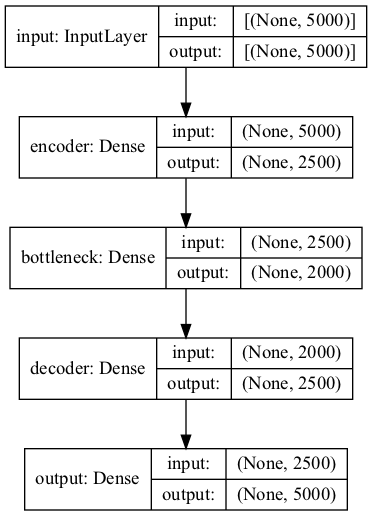

In [103]:
from keras.utils.vis_utils import plot_model

plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True, show_layer_names=True)

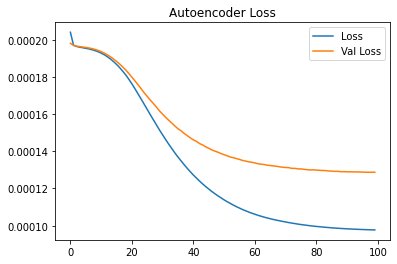

In [105]:
import matplotlib.pyplot as plt

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)  # A

# B
autoencoder_history = autoencoder.fit(vectorized_X_train, vectorized_X_train, 
                batch_size = 512, epochs = 100,  callbacks=[early_stopping_callback],
                shuffle = True, validation_split = 0.10)


plt.plot(autoencoder_history.history['loss'], label='Loss')
plt.plot(autoencoder_history.history['val_loss'], label='Val Loss')

plt.title('Autoencoder Loss')
plt.legend()

# A Stop training when the loss stops decreasing
# B Training our Auto-encoder network

In [110]:
latent_representation = Model(inputs=visible, outputs=bottleneck)  # A

encoded_X_train = latent_representation.predict(vectorized_X_train)  # B
encoded_X_test = latent_representation.predict(vectorized_X_test)  # B


ml_pipeline = Pipeline([
    ('classifier', clf)
])

params = {
    'classifier__C': [1e-1, 1e0, 1e1]  
}

print("Autoencoder + Log Reg\n=====================")
advanced_grid_search(
    encoded_X_train, train['sentiment'], encoded_X_test, test['sentiment'], 
    ml_pipeline, params
)

# A create our latent representation encoder
# B encode our training and testing corpus into our latent representation

Autoencoder + Log Reg
              precision    recall  f1-score   support

    negative       0.75      0.80      0.77       243
     neutral       0.78      0.78      0.78       260
    positive       0.85      0.80      0.82       269

    accuracy                           0.79       772
   macro avg       0.79      0.79      0.79       772
weighted avg       0.79      0.79      0.79       772

Best params: {'classifier__C': 1.0}
Overall took 9.15 seconds


Pipeline(steps=[('classifier', LogisticRegression(max_iter=10000))])

In [ ]:
# Transfer Learning with BERT

In [111]:
from transformers import BertTokenizer, BertModel  # A
import torch

bert_model = BertModel.from_pretrained('bert-base-uncased')  # B

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')  # C

tweet = 'I hate this airline'

token_ids = torch.tensor(bert_tokenizer.encode(tweet)).unsqueeze(0)  # D

bert_model(token_ids)[1].shape  # E

# A Imports for BERT
# B Load a vanilla BERT-base uncased (all lowercased) model
# C We also need to load the BERT tokenizer
# D Run a tokenized input through BERT
# E the base BERT model outputs fixed-length vectors of length 768

In [115]:
from tqdm import tqdm
import numpy as np

def batch_embed_text(bert_model, tokenizer, text_iterable, batch_size=256):
    ''' This helper method will batch embed an iterable of text using a given tokenizer and bert model '''
    encoding = tokenizer.batch_encode_plus(text_iterable, padding=True)
    input_ids = np.vstack(encoding['input_ids'])
    attention_mask = np.vstack(encoding['attention_mask'])
    
    def batch_array_idx(np_array, batch_size):
        for i in tqdm(range(0, np_array.shape[0], batch_size)):
            yield i, i + batch_size
            
    embedded = None

    for start_idx, end_idx in batch_array_idx(input_ids, batch_size=batch_size):
        batch_bert = bert_model(
            torch.tensor(input_ids[start_idx:end_idx]), 
            attention_mask=torch.tensor(attention_mask[start_idx:end_idx])
        )[1].detach().numpy()
        if embedded is None:
            embedded = batch_bert
        else:
            embedded = np.vstack([embedded, batch_bert])

    return embedded

bert_X_train = batch_embed_text(bert_model, bert_tokenizer, train['text'])

bert_X_test = batch_embed_text(bert_model, bert_tokenizer, test['text'])

100%|██████████| 4/4 [01:23<00:00, 20.96s/it]


In [116]:
ml_pipeline = Pipeline([
    ('classifier', clf)
])

params = {
    'classifier__C': [1e-1, 1e0, 1e1]  
}

print("BERT + Log Reg\n=====================")
advanced_grid_search(
    bert_X_train, train['sentiment'], bert_X_test, test['sentiment'], 
    ml_pipeline, params
)

BERT + Log Reg
              precision    recall  f1-score   support

    negative       0.85      0.86      0.85       243
     neutral       0.81      0.82      0.82       260
    positive       0.88      0.86      0.87       269

    accuracy                           0.85       772
   macro avg       0.85      0.85      0.85       772
weighted avg       0.85      0.85      0.85       772

Best params: {'classifier__C': 1.0}
Overall took 34.47 seconds


Pipeline(steps=[('classifier', LogisticRegression(max_iter=10000))])

In [117]:

assert 1 == 2

AssertionError: 

In [ ]:
# TODO BERT fine-tuned on tweets?

In [ ]:

# clean tweets (remove mentions, links, etc)
    # stemming / lemmatization
# PCA / SVD
# concat text features and other features (maybe)

# gridsearch on multiple models

# autoencoder to train features (feature learning)
# try on all classifiers again

# pre-trained bert
# fine-tuned bert

# final table with results

In [ ]:
from nlp import load_dataset, Dataset


sample_tweets, _ = train_test_split(train, test_size=0.9, random_state=0, stratify=train['sentiment'])

# Let's map our sentiment to a numerical classes. negative -> 0, neutral -> 1, and positive -> 2
sample_tweets['sentiment'] = sample_tweets['sentiment'].map({'negative': 0, 'neutral': 1, 'positive': 2})

# the trainer is expecting a 'label' (see the forward method in the docs)
sample_tweets['label'] = sample_tweets['sentiment']

print(sample_tweets['label'].value_counts())

sample_dataset = Dataset.from_pandas(sample_tweets)

# Dataset has a built in train test split method
sample_dataset = sample_dataset.train_test_split(test_size=0.3)

train_set = sample_dataset['train']
test_set = sample_dataset['test']

In [ ]:
# We will pad our dataset so that our input matrices are the same length and truncate anything longer than 512 tokens
def preprocess(data):
    return bert_tokenizer(data['text'], padding=True, truncation=True)

train_set = train_set.map(preprocess, batched=True, batch_size=len(train_set))
test_set = test_set.map(preprocess, batched=True, batch_size=len(test_set))

train_set.set_format('torch', 
                      columns=['input_ids', 'attention_mask', 'label'])
test_set.set_format('torch', 
                     columns=['input_ids', 'attention_mask', 'label'])

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer, Trainer, TrainingArguments

sequence_classification_model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased', num_labels=3
)

batch_size = 128
epochs = 10

warmup_steps = 500
weight_decay = 0.01

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=epochs,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_steps=warmup_steps,
    weight_decay=weight_decay,
    logging_dir='./logs',
)
# Define the trainer: 

trainer = Trainer(
    model=sequence_classification_model,
    args=training_args,
    train_dataset=train_set,
    eval_dataset=test_set
)

# Get initial metrics
trainer.evaluate()

In [ ]:
trainer.train()

In [ ]:
fine_tuned_bert_model = sequence_classification_model.bert

In [ ]:
fine_tuned_bert_X_train = batch_embed_text(fine_tuned_bert_model, bert_tokenizer, train['text'])

fine_tuned_bert_X_test = batch_embed_text(fine_tuned_bert_model, bert_tokenizer, test['text'])

In [ ]:
ml_pipeline = Pipeline([
    ('classifier', clf)
])

params = {
    'classifier__C': [1e-1, 1e0, 1e1]  
}

print("Fine-tuned BERT + Log Reg\n=====================")
advanced_grid_search(
    fine_tuned_bert_X_train, train['sentiment'],
    fine_tuned_bert_X_test, test['sentiment'],
    ml_pipeline, params
)